# Multiple Linear Regression

#### Base purpose of simple linear regression is to find the linear function that indicates the relation between dependent variable and independent variables. 

## Theory

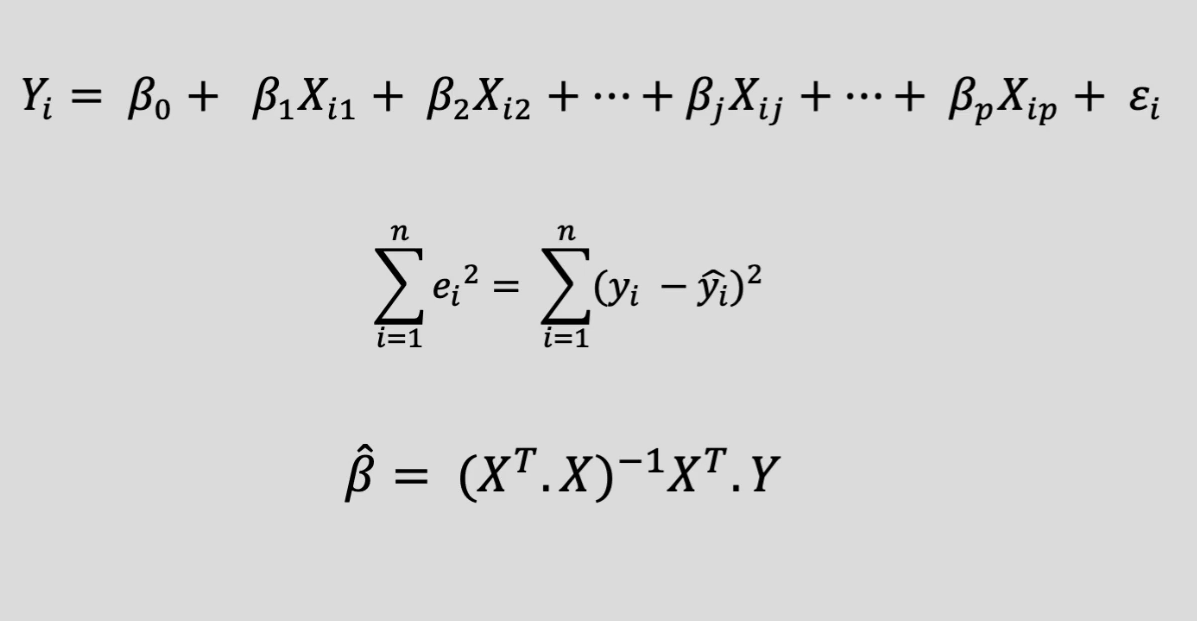

## Linear Regression Assumptions

##### Linear Relationship

##### Multivariate Normality

##### No or little multicollinearity

##### No auto-correlation

##### Homoscedasticity

## Model

In [2]:
import pandas as pd
ads = pd.read_csv("../../Datasets/Advertising.csv", usecols= [1, 2, 3, 4])
df = ads.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [23]:
X = df.drop("sales", axis=1)
y = df["sales"]

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [26]:
training = df.copy()

### Modelling with Statsmodels

In [28]:
import statsmodels.api as sm

In [29]:
lm = sm.OLS(y_train, X_train)

In [31]:
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2935.
Date:                Sun, 16 Jan 2022   Prob (F-statistic):                   1.28e-137
Time:                        00:55:08   Log-Likelihood:                         -336.65
No. Observations:                 160   AIC:                                      679.3
Df Residuals:                     157   BIC:                                      688.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0531      0.001     36.467      0.000       0.050       0.056
radio          0.2188      0.011     20.138      0.000       0.197       0.240
newspaper      0.0239      0.008      3.011      0.003       0.008       0.040
==============================================================================
Omnibus:                       11.405   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.574
Skew:                          -0.432   Prob(JB):                     0.000415
Kurtosis:                       4.261   Cond. No.                         13.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Modelling with Scikit-Learn

In [37]:
from sklearn.linear_model import LinearRegression

In [41]:
lrm = LinearRegression()
skmodel = lrm.fit(X_train, y_train)
skmodel.intercept_

2.9790673381226256

In [43]:
skmodel.coef_

array([0.04472952, 0.18919505, 0.00276111])

## Prediction

In [50]:
test_values = [[30], [10], [40]]
test_values = pd.DataFrame(test_values).T
test_values

,0,1,2
0,30,10,40


In [51]:
skmodel.predict(test_values)

array([6.32334798])

In [55]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [65]:
rmse = np.sqrt(mean_squared_error(y_train, skmodel.predict(X_train)))
rmse

1.6447277656443373

In [67]:
rmse = np.sqrt(mean_squared_error(y_test, skmodel.predict(X_test)))
rmse

1.7815996615334502

## Model Tuning

### 1) Randomization

In [97]:
X = df.drop("sales", axis=1)
y = df["sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=144)
lm = LinearRegression()
skmodel = lm.fit(X_train, y_train)

In [98]:
np.sqrt(mean_squared_error(y_train, skmodel.predict(X_train)))

1.6748559274650712

In [99]:
skmodel.score(X_train, y_train)

0.8971614078663419

In [100]:
cross_val_score(skmodel, X_train, y_train, cv=10, scoring="r2").mean()

0.873378329842294

In [102]:
np.sqrt(-cross_val_score(skmodel, X_train, y_train, cv=10, scoring="neg_mean_squared_error").mean())

1.746190549785076

In [103]:
np.sqrt(mean_squared_error(y_test, skmodel.predict(X_test)))

1.6640263686701038

In [104]:
np.sqrt(-cross_val_score(skmodel, X_test, y_test, cv=10, scoring="neg_mean_squared_error").mean())

1.8213882488500601